In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
from time import mktime
from google.colab import  drive

def fourier_featurize(X, d = 5, freq = 1):
  data = []
  for i in range(d):
    if i == 0:
      data.append(np.cos(i * freq * X).reshape(1,-1)[0])
    else:
      data.append(np.sin(i * freq * X).reshape(1,-1)[0])
      data.append(np.cos(i * freq * X).reshape(1,-1)[0])
  return np.array(data).T
def estimate_frequency(X, Y): #estimates frequency based on X matrix of time (shape (-1,1)) and Y data of transformed Right Ascension/Declination
  time = []
  peak = -np.inf
  minimum = np.inf
  for i in range(1, len(Y) - 1):
    if Y[i - 1] < Y[i] and Y[i + 1] < Y[i]:
      time.append(X[i])
  sum = 0
  for i in range(len(time)):
    if i > 0:
      sum += time[i] - time[i - 1]
  return (len(time) - 1)*2*np.pi/(sum)

In [2]:
def NN_prediction(X_train,y_train,X_test,y_test,hidden_layers,activation,max_iter = 50000,tol = 1e-6):
    
    model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation,max_iter = max_iter,tol=tol).fit(X_train, y_train)
    
    #MSE for training data
    prediction_train = model.predict(X_train)  
    MSE_train = mean_squared_error(prediction_train,y_train)
    
    #MSE for test data
    prediction_test = model.predict(X_test)
    MSE_test = mean_squared_error(prediction_test,y_test)
    
    return prediction_train, prediction_test, MSE_train, MSE_test

def reset_time(Time,num_cycles = 1):
    cycle = (Time.shape[0]/num_cycles)
    New_time = list(range(0,Time.shape[0]))
    mod_time = np.array(New_time).astype(int) % cycle
    return mod_time


#Test:
testing on a sum of sines similar to RA data

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression


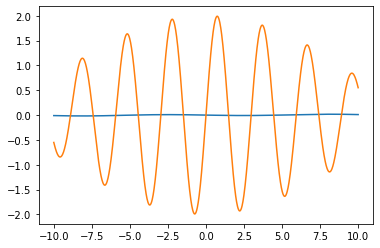

NN


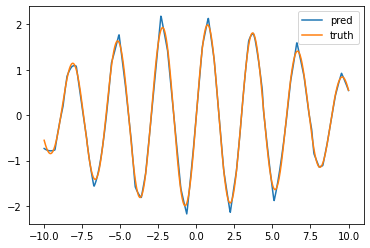

VALIDATION:
Regression


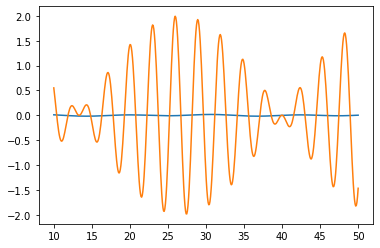

NN


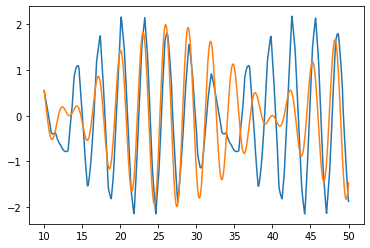

In [20]:
m = 5
d = 3

X = np.linspace(-10,10, 1000).reshape(-1,1)
Y = np.sin(np.sqrt(m)*X) + np.sin(2 * X)
f = 0.28

X1 = fourier_featurize(X, d, f)
X_test = np.linspace(10, 50, 500).reshape(-1,1)
Y_test = np.sin(np.sqrt(m)*X_test) + np.sin(2 * X_test)
X2 = fourier_featurize(X_test, d, f)
pred_train, pred_test, mse_train, mse_test = NN_prediction(X1, Y, X2 , Y_test, (10, 10), 'relu')
reg = LinearRegression().fit(X1, Y)
reg_predict = reg.predict(X1)
reg_predict_test = reg.predict(X2)
print('Regression')
plt.plot(X, reg_predict)
plt.plot(X, Y)
plt.show()
print('NN')
plt.plot(X, pred_train)
plt.plot(X, Y)
plt.legend(['pred', 'truth'])
plt.show()
print('VALIDATION:')
print('Regression')
plt.plot(X_test, reg_predict_test)
plt.plot(X_test, Y_test)
plt.show()
print('NN')
plt.plot(X_test, pred_test)
plt.plot(X_test, Y_test)
plt.show()

In [ ]:
drive.mount('/drive')
venus = pd.read_csv("/drive/My Drive/EECS189/PROJ S/Train_Test_data/Venus2x.csv")

In [ ]:
length = venus.shape[0]
cycle = int(length/2)
T = venus.copy()

#reset time, not sure if i should do this or not
T["Time"] = pd.to_datetime(T["Time"], infer_datetime_format=True)
unix_secs = T["Time"].apply(lambda t: mktime(t.timetuple()))
T["Time"] = unix_secs
T["Time"] = reset_time(T["Time"],num_cycles = 2)

hidden_layers = (500,200)
X_train = np.array(T["Time"][:(int(length/2))]).reshape(-1, 1)
y_train = np.array(T[['Right Ascension','Declination']][:(int(length/2))])

X_test = np.array(T["Time"][(int(length/2)):]).reshape(-1,1)
y_test = np.array(T[['Right Ascension','Declination']][(int(length/2)):])


preds_train, preds_test, MSE_test, MSE_train = NN_prediction(X_train,y_train,X_test,y_test,hidden_layers,'relu')



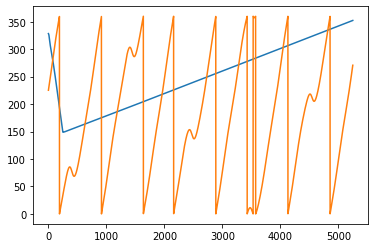

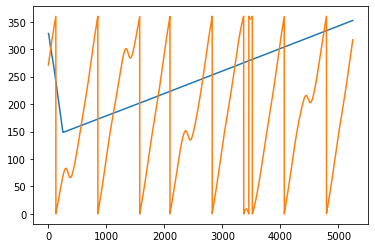

(9495.781522580532, 9281.133221880025)


In [ ]:
plt.plot(preds_test[:,0])
plt.plot(y_train[:,0])
plt.show()
plt.plot(preds_train[:,0])
plt.plot(y_test[:,0])
plt.show()
print((MSE_test,MSE_train))